In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import math as m
import numpy as np
import random
import copy

In [2]:
def agents_diff(N, money):
    agents = np.zeros(N)
    for i in range(len(agents)):
        agents[i] = random.randint(0,money)
    return agents

In [3]:
def tr_nearest(agent_array, tr_num,a):
    people = copy.copy(agent_array)
    current = 1
    m = []
    probs = []
    while current <= tr_num:
        i,j = random.sample(range(0, len(agent_array)-1),2)
        #print(i,j)
        m_i = people[i]
        m_j = people[j]
        #m1.append(m_i)
        #m2.append(m_j)
        #print(m_i,m_j)
        total_m = m_i + m_j
        diff = m_i-m_j
        if diff==0:
            diff = 1
        #print(diff)
        abs_diff = abs(diff)
        m.append(abs_diff)
        prob = 1/(abs_diff**(a))
        if prob >1:
            prob =1
        probs.append(prob)
        user_set = random.uniform(0,1)
        #print(prob)
        current += 1
        if prob>=user_set:
            epsilon = random.uniform(0,1)
            if people[i]>0 and people[j]>0:
                people[i] = epsilon*total_m
                people[j] = (1-epsilon)*total_m
            else:
                continue
        else:
            continue
       
    #print(total_money_begin, total_money_end)
    
    return m, probs

In [4]:
m1_7, probs1_7 = tr_nearest(agents_diff(1000,420),100000, 0.5)
m1_8, probs1_8 = tr_nearest(agents_diff(1000,420),100000, 1.0)
m1_9, probs1_9 = tr_nearest(agents_diff(1000,420),100000, 1.5)
m1_10, probs1_10 = tr_nearest(agents_diff(1000,420),100000, 2.0)
#trial_11 = tr_nearest(agents_diff(500,420),1000,0.7, 0)

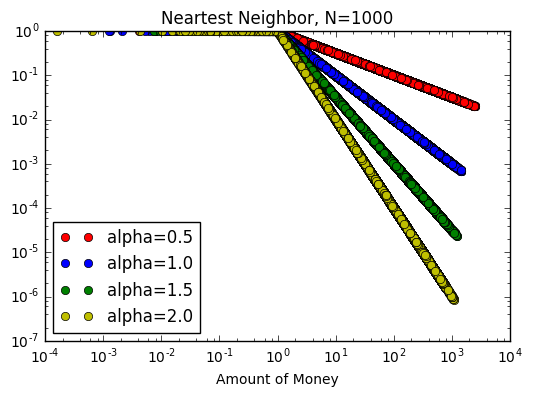

In [8]:
plt.loglog(m1_7,probs1_7,'ro',label='alpha=0.5')
plt.loglog(m1_8,probs1_8, 'bo', label='alpha=1.0')
plt.loglog(m1_9,probs1_9, 'go', label='alpha=1.5')
plt.loglog(m1_10,probs1_10, 'yo', label='alpha=2.0')
plt.legend(loc="lower left")
plt.title("Neartest Neighbor, N=1000")
plt.xlabel("Amount of Money")

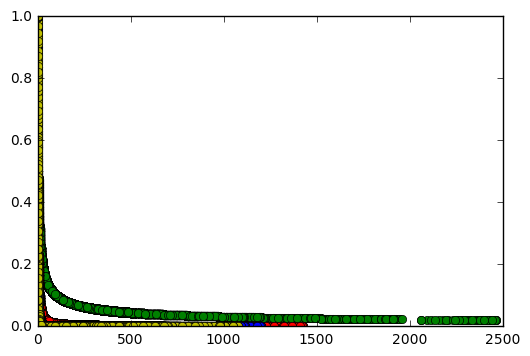

In [7]:
plt.plot(m1_7,probs1_7, 'go', label='alpha=0.5')
plt.plot(m1_8,probs1_8, 'ro', label='alpha=1.0')
plt.plot(m1_9,probs1_9, 'bo', label='alpha=1.5')
plt.plot(m1_10,probs1_10, 'yo', label='alpha=2.0')